# Final Challenge Code:Nation Data Science

***
## Purpose

The purpose of this product is to provide an automated service that recommends leads to a user given their current customer list (Portfolio).
 
## Contextualization

Some companies would like to know who the other companies in a particular market (population) are most likely to become their next customers. That is, your solution must find in the market who are the most adherent leads given the characteristics of customers in the user portfolio.

In addition, your solution must be user agnostic. Any user with a customer list who wants to explore this market can derive value from the service.

For the challenge, the following bases should be considered:

* Market: Base with information about the companies of the Market to be considered.
* Portfolio 1: Company 1 Customer Ids
* Portfolio 2: Company 2 Customer Ids
* Portfolio 3: Company 3 Customer Ids

Note: all portfolio companies (ids) are contained in the Market (population base).

Download link for Market, Portfolio 1, Portfolio 2 and Portfolio 3 bases below:

[https://drive.google.com/open?id=1y8-kGTMrsMi4q49x7LBYfu_iP2f0Xudi](https://drive.google.com/open?id=1y8-kGTMrsMi4q49x7LBYfu_iP2f0Xudi)

[https://drive.google.com/open?id=1hgBhk-S0jKCF-GYBz8eaaktvmkH9xI0b](https://drive.google.com/open?id=1hgBhk-S0jKCF-GYBz8eaaktvmkH9xI0b)

[https://drive.google.com/open?id=1bbSy_0C981TbenfQOAhaK6Q_-q-ppq1X](https://drive.google.com/open?id=1bbSy_0C981TbenfQOAhaK6Q_-q-ppq1X)

[https://drive.google.com/open?id=18VH0WhmF3iRLk_pVwcTclUn_AiZFGYTX](https://drive.google.com/open?id=18VH0WhmF3iRLk_pVwcTclUn_AiZFGYTX)

Portfolio bases can be used to test solution adherence. In addition, if the team wishes, they can simulate portfolios by sampling on the market.

## Mandatory Technical Requirements

- Use data science and machine learning techniques to develop the project;
- Present model development and outputs on a Jupyter Notebook or other Machine Learning model Output presentation technology;
- The analysis should consider the following points: exploratory data analysis, data processing, algorithm evaluation, model training, model performance evaluation and results visualization;
- For project presentation, the time between model training and output should be less than 20 min.


***
## Description of steps:

- T1 - handling 1: Collection in the market of missing information in the portfolio;
- T2 - handling 2: Exclusion of clients deemed inappropriate for having fiscal or financial problems;
- T3 - handling 3: Exclusion of features with high percentage of NA's values and filling of the remaining NA's;
- T4 - handling 4: Exclusion of clients that do not have similar values to the portfolio;
- T5 - handling 5: Conversion of values to numeric type;
- Organization of Datasets processed for the model;
- Characteristics of current customers;
- Model KNN Recommendation;
- Recommended customer characteristics.

***
## Libraries and Files:

> ### Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn import preprocessing
%matplotlib inline

> ### Data:

In [2]:
market = pd.read_csv("estaticos_market.csv")

In [3]:
portfolio = pd.read_csv("estaticos_portfolio2.csv")

In [4]:
dictionary = pd.read_csv("dicionario.csv")

In [5]:
# Adjust for viewing:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', len(market.columns))
pd.set_option('display.max_rows', len(market))

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***
## T1 - Dataset Supplement Portfolio:
The portfolio dataset has only the column 'id', we will complete with the other data that are present in the dataset market.

In [6]:
# DataFrame handling  Step 1:
market_T1= market.copy()

# Creation of id_num column to help manipulation:
market_T1['id_num'] = market_T1['Unnamed: 0']

# Delete column 'Unnamed: 0':
market_T1 = market_T1.drop(['Unnamed: 0'], axis = 1)

# Complete portfolio generation:
portfolio_T1 = pd.DataFrame(portfolio['id'])
portfolio_T1 = pd.merge(portfolio_T1, market, on='id', how='left')

> ### Heads:

In [7]:
market_T1.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,

In [8]:
portfolio_T1.head(3)

,id,Unnamed: 0,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,1646,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURI

> ### Rows x Columns:

In [9]:
print('Market:', market_T1.shape)
print('Portfolio:', portfolio_T1.shape)

Market: (462298, 182)
Portfolio: (566, 182)


***
## T2 - Excluding companies with tax, legal, financial or operational issues:

In [10]:
# DataFrame handling step 2:
market_T2= market_T1.copy()

>### fl_st_especial:

fl_st_especial == True, indicates if the company is in extraordinary situation (collapse, bankruptcy and others)

In [11]:
dictionary.loc[dictionary['Coluna'] == 'fl_st_especial']

,Coluna,Tipo,Descrição
14,fl_st_especial,boolean value,true if dt_situacao_especial is not null. If it is not null means that some extraordinary situation is identified by the IRS (*ESPOLIO DE EMPRESARIO EMPRESA INDIVIDUAL OU EIRELI | *FALIDO | *EM LIQUIDACAO | *LIQUIDACAO JUDICIAL | *LIQUIDACAO EXTRA JUDICIAL | *REGISTRO NA JUNTA COMERCIAL EM ANDAMENTO | *EM LIQUID EXTRA JUDICIAL | *RECUPERACAO JUDICIAL | *INTERVENCAO*)


In [12]:
# Count:
market_T2['fl_st_especial'].value_counts()

False    462230
True     68    
Name: fl_st_especial, dtype: int64

In [13]:
# Elimination of troubled companies:
market_T2 = market_T2[market_T2['fl_st_especial'] != True]

> ### fl_simples_irregular

fl_simples_irregular == True, indicates that the company is in the simple and irregular taxation model.

In [14]:
dictionary.loc[dictionary['Coluna'] == 'fl_simples_irregular']

,Coluna,Tipo,Descrição
41,fl_simples_irregular,boolean,true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.


In [15]:
# Count: 
market_T2['fl_simples_irregular'].value_counts()

False    459962
True     341   
Name: fl_simples_irregular, dtype: int64

In [16]:
# Elimination of troubled companies:
market_T2 = market_T2[market_T2['fl_simples_irregular'] != True]

> ### de_saude_tributaria

de_saude_tributaria: Green indicates that it is ok, red indicates a tax problem.

In [17]:
dictionary.loc[dictionary['Coluna'] == 'de_saude_tributaria']

,Coluna,Tipo,Descrição
36,de_saude_tributaria,character,indicator of health tax status | Green if all tax are OK | Red if none are OK


In [18]:
# Count: 
market_T2['de_saude_tributaria'].value_counts()

VERDE       145253
AZUL        105069
AMARELO     91016 
CINZA       64018 
LARANJA     36082 
VERMELHO    5600  
Name: de_saude_tributaria, dtype: int64

In [19]:
# Elimination of troubled companies:
market_T2 = market_T2[market_T2['de_saude_tributaria'] != 'VERMELHO']

> ### de_nivel_atividade

de_nivel_activity: Probability of the company to be active.

In [20]:
dictionary.loc[dictionary['Coluna'] == 'de_nivel_atividade']

,Coluna,Tipo,Descrição
39,de_nivel_atividade,character,probability of being operating | ALTA high probality | BAIXA | low probality.


In [21]:
# Count: 
market_T2['de_nivel_atividade'].value_counts()

MEDIA          215322
ALTA           151237
BAIXA          73989 
MUITO BAIXA    4573  
Name: de_nivel_atividade, dtype: int64

In [22]:
# Elimination of troubled companies:
market_T2 = market_T2[market_T2['de_nivel_atividade'] != 'MUITO BAIXA']
market_T2 = market_T2[market_T2['de_nivel_atividade'] != 'BAIXA']

> ### qt_socios_st_suspensa

qt_socios_st_suspensa: Irregularities of the partners with the IRS.

In [23]:
dictionary.loc[dictionary['Coluna'] == 'qt_socios_st_suspensa']

,Coluna,Tipo,Descrição
54,qt_socios_st_suspensa,integer value,quantity of partners with suspended situation under IRS - Receit Federal


In [24]:
# Count: 
(market_T2['qt_socios_st_suspensa'] == market_T2['qt_socios']).value_counts()

False    376439
True     1288  
dtype: int64

In [25]:
# Elimination of troubled companies:
market_T2 = market_T2[(market_T2['qt_socios_st_suspensa'] == market_T2['qt_socios']) != True]

> ### Coligados com situação irregular

Number of affiliates with irregular status ('Suspenso', 'Inapto' and 'Baixado') equal to the 'total' quantity.

In [26]:
dictionary.loc[dictionary['Coluna'].isin(['qt_coligados', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa'])]

,Coluna,Tipo,Descrição
70,qt_coligados,integer value,quantity of connected companies
74,qt_coligados_baixada,integer value,quantity of connected companies that are considered as closed according to the IRS
75,qt_coligados_inapta,integer value,quantity of connected companies that are considered as inapt/unfit according to the IRS
76,qt_coligados_suspensa,integer value,quantity of connected companies that are considered suspended according to the IRS


In [27]:
# Count:
(market_T2['qt_coligados_suspensa'] + market_T2['qt_coligados_inapta'] + market_T2['qt_coligados_baixada'] == market_T2['qt_coligados']).value_counts()

False    376223
True     216   
dtype: int64

In [28]:
# Elimination of troubled companies:
market_T2 = market_T2[(market_T2['qt_coligados_suspensa'] + market_T2['qt_coligados_inapta'] + market_T2['qt_coligados_baixada'] == market_T2['qt_coligados']) != True]

> ***

#### Market after T2:

In [29]:
# Comparative:
print('Starter Market:', market_T1.shape)
print('Market after handling:', market_T2.shape)
print('Inappropriate companies eliminated from market:', market_T1.shape[0] - market_T2.shape[0])

Starter Market: (462298, 182)
Market after handling: (376223, 182)
Inappropriate companies eliminated from market: 86075


#### Portfolio after T2:

In [30]:
# portfolio only with good companies:
portfolio_T2 = pd.DataFrame(portfolio['id'])
portfolio_T2['Tr_exc'] = portfolio_T2['id'].isin(market_T2['id'])
portfolio_T2 = portfolio_T2[portfolio_T2['Tr_exc'] == True]
portfolio_T2 = portfolio_T2.drop(['Tr_exc'], axis = 1)
portfolio_T2 = pd.merge(portfolio_T2, market_T2, on='id', how='left')

# Comparative:
print('Starter Portfolio:', portfolio_T1.shape)
print('Portfolio after handling:', portfolio_T2.shape)
print('Inappropriate companies eliminated:', portfolio_T1.shape[0] - portfolio_T2.shape[0])

Starter Portfolio: (566, 182)
Portfolio after handling: (546, 182)
Inappropriate companies eliminated: 20


In [31]:
# Portfolio Clients Who Are Inappropriate Situation:
portfolio_inappropriate = pd.DataFrame()
portfolio_inappropriate['Client'] = portfolio['id']
portfolio_inappropriate['Regular'] = portfolio['id'].isin(portfolio_T2['id'])
portfolio_inappropriate = portfolio_inappropriate[portfolio_inappropriate['Regular'] == False]
portfolio_inappropriate = portfolio_inappropriate.drop(['Regular'], axis = 1)
portfolio_inappropriate

,Client
52,f081e5c6355d6ae432cb62330fc4108a39616f1bf3d2623011b8b647a3620cec
75,e3174d9abd5a195233146f3bef34f058cd80c8aecc6412f64c64829b85a9473f
109,61f63dac76901fbafec4d97317900dbc06252f7c36c958d1892b3dd3a0ace272
204,c3c63a4ef42ecd74ef57f72b0c7dc182a83b8e0d2ca5247a7e26bfe1c82bbb16
225,17a37a9bc0e9a88fc2437262d5e11fe922954e1475c235dbdd41a8e1f779badb
229,fda284ef3b3edd25e135100c24222ba463dfe785a4d99c1b90b19e921c26b695
239,8953244b715397582014199d458c06c5ff65d5b6877d738b970ab4b4388b7cef
276,752b5f0fd82cb08061d93bed226963322a9ae1ed5b6bf3d497b054f332955932
303,a333b90fd76570d46d00beb7d6cdffa913703f5bd02b76e41d428b5b704f30e7
321,fd1c478c0154ff67a38a07db55e3ca31e77d0a04e4932cdaf7a78ab85f4f4cb8


***
## T3 - NA's Handling

> ### NA's per columns:

In [32]:
# NA's percentage check
qt_na_per_col_portfolio_T2 = pd.DataFrame(portfolio_T2.isna().sum().sort_values(ascending=False).reset_index())
qt_na_per_col_portfolio_T2.columns = ['Column', 'qt_NA']
qt_na_per_col_portfolio_T2['qt_not_NA'] = (len(portfolio_T2) - qt_na_per_col_portfolio_T2['qt_NA'])
qt_na_per_col_portfolio_T2['Percentage_of_NA'] = ((qt_na_per_col_portfolio_T2['qt_NA'] * 100) / len(portfolio_T2)).round(2)
qt_na_per_col_portfolio_T2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
Column,grau_instrucao_macro_desconhecido,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,idade_media_coligadas_baixadas,coligada_mais_nova_baixada,qt_socios_st_suspensa,coligada_mais_antiga_baixada,vl_total_veiculos_antt,vl_total_veiculos_antt_grupo,vl_total_tancagem,vl_total_tancagem_grupo,qt_socios_pep,qt_socios_pj_nulos,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_socios_pj_ativos,qt_socios_pj_baixados,vl_potenc_cons_oleo_gas,grau_instrucao_macro_analfabeto,total_filiais_coligados,max_filiais_coligados,media_filiais_coligados,min_filiais_coligados,qt_socios_feminino,idade_ate_18,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,min_funcionarios_coligados_gp,max_funcionarios_coligados_gp,qt_funcionarios_coligados,media_funcionarios_coligados_gp,qt_funcionarios_coligados_gp,qt_art,sum_faturamento_estimado_coligadas,min_faturamento_est_coligados_gp,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,faturamento_est_coligados,qt_coligados_nula,idade_media_coligadas_ativas,qt_coligados_exterior,qt_coligados_sudeste,qt_coligados_centro,qt_coligados_nordeste,qt_coligados_sul,qt_coligados_norte,qt_coligados_epp,qt_coligados_ltda,qt_coligados_me,qt_coligados_sa,qt_coligadas,coligada_mais_antiga_ativa,qt_coligados_suspensa,coligada_mais_nova_ativa,idade_minima_coligadas,idade_maxima_coligadas,idade_media_coligadas,qt_regioes_coligados,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_ufs_coligados,qt_coligados_mei,qt_ramos_coligados,qt_coligados_industria,qt_coligados_atividade_inativo,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_baixo,qt_coligados_ccivil,qt_coligados_serviço,qt_coligados_comercio,qt_coligados_agropecuaria,qt_socios_masculino,qt_socios_st_regular,idade_minima_socios,idade_media_socios,idade_maxima_socios,qt_socios,qt_socios_pj,qt_socios_pf,de_indicador_telefone,vl_frota,idade_de_19_a_23,vl_total_veiculos_pesados,vl_total_veiculos_leves,nm_meso_regiao,nm_micro_regiao,empsetorcensitariofaixarendapopulacao,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,idade_de_54_a_58,grau_instrucao_macro_escolaridade_superior,idade_de_24_a_28,idade_de_49_a_53,idade_de_44_a_48,idade_de_29_a_33,grau_instrucao_macro_escolaridade_media,tx_crescimento_24meses,tx_crescimento_12meses,idade_de_34_a_38,idade_de_39_a_43,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_matriz,fl_optante_simples,fl_epp,de_natureza_juridica,dt_situacao,fl_st_especial,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_ltda,sg_uf,fl_mei,fl_sa,fl_me,idade_emp_cat,idade_empresa_anos,setor,de_ramo,natureza_juridica_macro,fl_email,id_num,fl_optante_simei,min_meses_servicos_all,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,media_meses_servicos,sg_uf_matriz,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_f

In [33]:
# DataFrame handling Step 3:
market_T3 = market_T2.copy()

> ### Exclusion High Percent NA Columns:

In [34]:
percent_NA = 60

In [35]:
# Selection of all columns that have high NA's:
column_NA_exclusion = qt_na_per_col_portfolio_T2['Column'].loc[qt_na_per_col_portfolio_T2['Percentage_of_NA'] >= percent_NA]
# Exclusion of columns:
market_T3 = market_T3.drop(column_NA_exclusion, axis = 1)

In [36]:
# Delete columns 'dt_situacao'
market_T3 = market_T3.drop(['dt_situacao'], axis = 1)

> ### Data Types:

In [37]:
# Types:
types_market_T3 = pd.DataFrame(market_T3.dtypes).reset_index()
types_market_T3.columns = ['Columns', 'types']
types_market_T3.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
types,object,bool,object,object,object,object,object,float64,object,bool,bool,bool,bool,bool,bool,bool,bool,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,object,object,object,object,float64,object,object,object,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,flo

In [38]:
# type lists:
type_float = list (market_T3.select_dtypes (include = ['float']). columns)
type_int = list (market_T3.select_dtypes (include = ['int']). columns)
type_bool = list (market_T3.select_dtypes (include = ['bool']). columns)
type_object = list (market_T3.select_dtypes (include = ['object']). columns)

In [39]:
# Removal of identifying columns from type lists:
type_object.remove('id')
type_int.remove('id_num')

> ### Fill NA'S:

- Numeric variables by 0;
- Categorical variables by value 'INDETERMINADA';

In [40]:
# Fill Na's
market_T3[type_int] = market_T3[type_int].fillna(0)
market_T3[type_float] = market_T3[type_float].fillna(0)
market_T3[type_object] = market_T3[type_object].fillna('INDETERMINADA')

In [41]:
# Dataframe display after handling:
market_T3.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,True,8.0,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,BOA,False,0.0,0.00,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,220.477778,536.366667,57.3,57.3,536.366667,220.477778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,5.0,0.0,145.0,145.0,36.25,91.0,6.0,9375912.0,2343978.0,5275238.5,638798.4,9375912.0,2343978.0,5275238.5,638798.4,21809443.0,3.634907e+06,13188096.0,210000.0,22019443.0,3.669907e+06,13188096.0,210000.0,0.0,0.0,0.0,0.0,0.0,6.0,21809443.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",31321

#### Market after T3:

In [42]:
# Comparative:
print('Starter Market:', market_T2.shape)
print('Market after handling:', market_T3.shape)
print('Unimportant columns deleted:', market_T2.shape[1] - market_T3.shape[1])

Starter Market: (376223, 182)
Market after handling: (376223, 151)
Unimportant columns deleted: 31


***
## T4 - Scope Reduction:

In [43]:
# DataFrame handling step 4:
market_T4 = market_T3.copy()

# Complete portfolio generation:
portfolio_T4 = pd.DataFrame(portfolio['id'])
portfolio_T4['Tr_exc'] = portfolio_T4['id'].isin(market_T3['id'])
portfolio_T4 = portfolio_T4[portfolio_T4['Tr_exc'] == True]
portfolio_T4 = portfolio_T4.drop(['Tr_exc'], axis = 1)
portfolio_T4 = pd.merge(portfolio_T4, market_T3, on='id', how='left')

In [44]:
# Current Market Dimensions:
market_T4.shape

(376223, 151)

In [45]:
# NA's market percentage check:
qt_na_per_col = pd.DataFrame(market_T1.isna().sum().sort_values(ascending=False).reset_index())
qt_na_per_col.columns = ['Column', 'qt_NA']
qt_na_per_col['qt_not_NA'] = (len(market_T1) - qt_na_per_col['qt_NA'])
qt_na_per_col['Percentage_of_NA'] = ((qt_na_per_col['qt_NA'] * 100) / len(market_T1)).round(2)

# 100% filled-in variables
market_100pct = qt_na_per_col[qt_na_per_col['qt_NA'] == 0]
market_100pct.T

,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
Column,fl_matriz,fl_me,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,idade_empresa_anos,idade_emp_cat,id_num,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,qt_filiais,id
qt_NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
qt_not_NA,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298,462298
Percentage_of_NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> #### Removal of non-similar values:

#### Similar Values in Object Type Columns:

In [46]:
# Object column 100% filled for non-similar elimination:
market_100pct_object = market_100pct['Column'][market_100pct['Column'].isin(type_object) == True]
market_100pct_object

165    de_natureza_juridica   
166    sg_uf                  
167    natureza_juridica_macro
168    de_ramo                
170    idade_emp_cat          
179    fl_rm                  
Name: Column, dtype: object

In [47]:
# Elimination of non-similar:
market_reduced = pd.DataFrame()
market_reduced = market_T4[market_T4['de_natureza_juridica'].isin(portfolio_T4['de_natureza_juridica'].unique()) == True]
market_reduced = market_reduced[market_reduced['sg_uf'].isin(portfolio_T4['sg_uf'].unique()) == True]
market_reduced = market_reduced[market_reduced['natureza_juridica_macro'].isin(portfolio_T4['natureza_juridica_macro'].unique()) == True]
market_reduced = market_reduced[market_reduced['de_ramo'].isin(portfolio_T4['de_ramo'].unique()) == True]
market_reduced = market_reduced[market_reduced['idade_emp_cat'].isin(portfolio_T4['idade_emp_cat'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_rm'].isin(portfolio_T4['fl_rm'].unique()) == True]
market_reduced.shape

(125635, 151)

#### Similar values in bool columns:

In [48]:
# 100% bool column filled for non-similar elimination:
market_100pct_bool = market_100pct['Column'][market_100pct['Column'].isin(type_bool) == True]
market_100pct_bool

163    fl_matriz     
164    fl_me         
172    fl_sa         
173    fl_epp        
174    fl_mei        
175    fl_ltda       
176    fl_st_especial
177    fl_email      
178    fl_telefone   
Name: Column, dtype: object

In [49]:
# Elimination of non-similar:
market_reduced = market_reduced[market_reduced['fl_matriz'].isin(portfolio_T4['fl_matriz'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_me'].isin(portfolio_T4['fl_me'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_sa'].isin(portfolio_T4['fl_sa'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_epp'].isin(portfolio_T4['fl_epp'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_mei'].isin(portfolio_T4['fl_mei'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_ltda'].isin(portfolio_T4['fl_ltda'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_st_especial'].isin(portfolio_T4['fl_st_especial'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_email'].isin(portfolio_T4['fl_email'].unique()) == True]
market_reduced = market_reduced[market_reduced['fl_telefone'].isin(portfolio_T4['fl_telefone'].unique()) == True]
market_reduced.shape

(116001, 151)

#### Similar values in columns of type int:

In [50]:
# 100% int column filled out for non-similar elimination:
market_100pct_int = market_100pct['Column'][market_100pct['Column'].isin(type_int) == True]
market_100pct_int

180    qt_filiais
Name: Column, dtype: object

In [51]:
# Elimination of non-similar:
market_reduced = market_reduced[market_reduced['qt_filiais'].between(portfolio_T4['qt_filiais'].min(), portfolio_T4['qt_filiais'].max(), inclusive=True) == True]
market_reduced.shape

(115999, 151)

#### Similar values in float columns:

In [52]:
# 100% float column filled for non-similar elimination:
market_100pct_float = market_100pct['Column'][market_100pct['Column'].isin(type_float) == True]
market_100pct_float

169    idade_empresa_anos
Name: Column, dtype: object

In [53]:
# Elimination of non-similar:
market_reduced = market_reduced[market_reduced['idade_empresa_anos'].between(portfolio_T4['idade_empresa_anos'].min(), portfolio_T4['idade_empresa_anos'].max(), inclusive=True) == True]
print("Market reduced:", market_reduced.shape)
print("Market reduced without current customers::",(market_reduced.shape[0] - portfolio_T4.shape[0], market_reduced.shape[1]))

Market reduced: (115696, 151)
Market reduced without current customers:: (115150, 151)


> ***

#### Further optimizing reduction with other features:

In [54]:
# According to the NA percentage of these features in portfolios 1,2 and 3, the code below works normally.
# However, in new portfolios there is a possibility of not working, being necessary to change or delete this cell.

market_reduced = market_reduced[market_reduced['nm_segmento'].isin(portfolio_T4['nm_segmento'].unique()) == True]
market_reduced = market_reduced[market_reduced['nm_meso_regiao'].isin(portfolio_T4['nm_meso_regiao'].unique()) == True]
market_reduced = market_reduced[market_reduced['de_faixa_faturamento_estimado_grupo'].isin(portfolio_T4['de_faixa_faturamento_estimado'].unique()) == True]

market_reduced.shape

(1543, 151)

> ***

In [55]:
# Market view after handling:
market_reduced.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
123,6e292487550f4b68a5a710b1512039761b07cdb9d1125728af3e601076c8946b,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.876712,> 20,False,False,False,False,False,False,False,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,1.0,1.0,False,0.0,1.0,1.0,False,PI,AZUL,ACIMA DE 1 ANO,23.0,ALTA,INDETERMINADA,False,132025.0,349.93,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",29

***

In [56]:
# Complete portfolio generation:
portfolio_T4 = pd.DataFrame(portfolio['id'])
portfolio_T4['Tr_exc'] = portfolio_T4['id'].isin(market_T3['id'])
portfolio_T4 = portfolio_T4[portfolio_T4['Tr_exc'] == True]
portfolio_T4 = portfolio_T4.drop(['Tr_exc'], axis = 1)
portfolio_T4 = pd.merge(portfolio_T4, market_T3, on='id', how='left')

In [57]:
# market reduced without current customers:
market_reduced_without_clients = pd.DataFrame(market_reduced['id'])
market_reduced_without_clients['Tr_exc'] = market_reduced_without_clients['id'].isin(portfolio_T4['id'])
market_reduced_without_clients = market_reduced_without_clients[market_reduced_without_clients['Tr_exc'] != True]
market_reduced_without_clients = market_reduced_without_clients.drop(['Tr_exc'], axis = 1)
market_reduced_without_clients = pd.merge(market_reduced_without_clients, market_T4, on='id', how='left')

In [58]:
market_reduced_without_clients.shape

(997, 151)

> ***

In [59]:
# Market view after handling:
market_reduced_without_clients.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,6e292487550f4b68a5a710b1512039761b07cdb9d1125728af3e601076c8946b,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.876712,> 20,False,False,False,False,False,False,False,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,1.0,1.0,False,0.0,1.0,1.0,False,PI,AZUL,ACIMA DE 1 ANO,23.0,ALTA,INDETERMINADA,False,132025.0,349.93,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",2987

> ***
#### Market after T4:

In [60]:
# Comparative:
print('Starter Market:', market_T1.shape)
print('Market after handling:', market_reduced_without_clients.shape)
print('Non-similar and inappropriate companies eliminated from the market:', market_T1.shape[0] - market_reduced_without_clients.shape[0])

Starter Market: (462298, 182)
Market after handling: (997, 151)
Non-similar and inappropriate companies eliminated from the market: 461301


***
## T5 - Codificação de variavéis:

In [61]:
# DataFrame handling step 5:
market_T5_a = market_reduced.copy()

In [62]:
# Exclusion of identification variables:
market_T5_b = market_T5_a.drop(['id', 'id_num'], axis = 1)
# Market view:
market_T5_b.head(3)

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
123,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.876712,> 20,False,False,False,False,False,False,False,False,NAO,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,1.0,1.0,False,0.0,1.0,1.0,False,PI,AZUL,ACIMA DE 1 ANO,23.0,ALTA,INDETERMINADA,False,132025.0,349.93,NORTE PIAUIENSE,BAIXO PARNAIBA PIAUIENSE,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 10.000.000,01 A R$ 30.000.000,00","DE R$ 10.000.000,01 A R$ 30.000.000,00",29879280.0,29879280.0,7.0,187.0,30.48,69.52,0.0,0.0,2.0,11.0,38.0,23.0,40.0,2

In [63]:
# Conversions:
market_T5_b[type_float] = market_T5_b[type_float].astype('int')
market_T5_b[type_bool] = market_T5_b[type_bool].astype('category')
market_T5_b[type_bool] = market_T5_b[type_bool].apply(lambda x: x.cat.codes)
market_T5_b[type_object] = market_T5_b[type_object].astype('category')
market_T5_b[type_object] = market_T5_b[type_object].apply(lambda x: x.cat.codes)

In [64]:
# Market Reconstruction:
market_T5 = market_T5_a[['id','id_num']]
market_T5 = pd.concat([market_T5, market_T5_b], axis=1)

In [65]:
# Data normalization:
market_T5[market_T5.columns[2:]] = preprocessing.scale(market_T5[market_T5.columns[2:]])

> ***
#### Market after T5:

In [66]:
# Full market view:
market_T5.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
123,6e292487550f4b68a5a710b1512039761b07cdb9d1125728af3e601076c8946b,123,0.0,-0.757912,0.316742,1.510151,-1.032229,0.801854,1.481297,0.693340,-0.050981,-0.188601,0.0,0.0,-0.084736,0.0,-0.956238,-1.104601,-1.131005,-1.134457,-1.358969,-0.214713,-0.455363,0.383682,-0.310750,-0.318511,-0.244444,-0.162541,-0.255584,-0.297107,0.0,0.316742,-1.555775,0.0,-0.289936,-0.275701,1.902567,0.0,-0.216398,-0.794795,0.758908,-1.349996,0.456400,-0.498986,-0.473029,-0.281223,-1.254436,-1.249265,-1.205217,-0.481799,-0.600058,-0.339463,-0.280292,-0.336725,-0.287557,-0.025466,-0.097195,0.0,0.0,-0.802804,-0.799215,-0.554135,-0.554488,-0.798731,-0.802119,-0.14614,-0.025466,-0.050981,-0.123521,0.0,-0.306736,-0.083175,-0.202101,-0.112355,-0.085899,-0.127021,-0.648227,-0.834948,-0.606632,-0.199904,-0.168863,-0.130569,-0.399853,-0.06844,-0.249217,-0.089304,-0.062787,-0.074603,-0.076856,-0.224336,-0.179035,-0.211500,-0.0962

> ***
#### Portfolio after T5

In [67]:
portfolio_T5 = pd.DataFrame(portfolio['id'])
portfolio_T5['Tr_exc'] = portfolio_T5['id'].isin(market_T5['id'])
portfolio_T5 = portfolio_T5[portfolio_T5['Tr_exc'] == True]
portfolio_T5 = portfolio_T5.drop(['Tr_exc'], axis = 1)
portfolio_T5 = pd.merge(portfolio_T5, market_T5, on='id', how='left')

In [68]:
# Full Portfolio View:
portfolio_T5.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d,1646,0.0,-2.303698,-1.716821,-1.537142,-1.032229,0.801854,-1.282790,-1.841787,-0.050981,-0.188601,0.0,0.0,-0.084736,0.0,1.045764,0.905304,-1.131005,-1.134457,-1.358969,-0.214713,-0.455363,0.383682,-0.204864,-0.366547,-0.244444,-0.162541,-0.285986,-0.214471,0.0,-1.716821,0.697215,0.0,-0.289936,-0.275701,-0.525606,0.0,-0.246671,0.870863,2.286197,0.894318,0.4564,-0.498986,-0.473029,-0.281223,-1.254436,-1.249265,-1.205217,-0.481799,-0.600058,-0.339463,-0.280292,-0.336725,-0.287557,-0.025466,-0.097195,0.0,0.0,-0.802804,-0.799215,-0.554135,-0.554488,-0.798731,-0.802119,-0.14614,-0.025466,-0.050981,-0.123521,0.0,-0.306736,-0.083175,-0.202101,-0.112355,-0.085899,-0.127021,-0.648227,-0.834948,-0.606632,-0.199904,-0.168863,-0.130569,-0.399853,-0.06844,-0.249217,-0.089304,-0.062787,-0.074603,-0.076856,-0.224336,-0.179035,-0.2115,-0.096256,-

***
## Datasets for modeling:

> #### Market handling:

In [69]:
# Full Market:
full_market = market_T5.copy()

In [70]:
# Market whitout id:
full_market_wtt_id = market_T5_b.copy()

> #### Market treated without current customers:

In [71]:
# Market without current customers:
target_market = pd.DataFrame(full_market['id'])
target_market['Tr_exc'] = target_market['id'].isin(portfolio_T5['id'])
target_market = target_market[target_market['Tr_exc'] != True]
target_market = target_market.drop(['Tr_exc'], axis = 1)
target_market = pd.merge(target_market, full_market, on='id', how='left')

In [72]:
# Market without current customers and without id:
target_market_wtt_id = target_market.drop(['id', 'id_num'], axis = 1)

> #### Portfolio handling:

In [73]:
# Full portfolio:
full_portfolio = portfolio_T5.copy()

In [74]:
# portfolio without id:
full_portfolio_wtt_id = full_portfolio.drop(['id', 'id_num'], axis = 1)

> ***
- original market  : market
- original market  with 'id_num' : market_T1
- original portfolio : portfolio
>***
- market handling : full_market
- market handling with id's : full_market_wtt_id
>***
- market handling without current clients : target_market
- market handling without current clients and without id's : target_market_wtt_id
>***
- portfolio handling : full_portfolio
- portfolio handling without id's : full_portfolio_wtt_id
> ***

***
### Features of Current Customers:

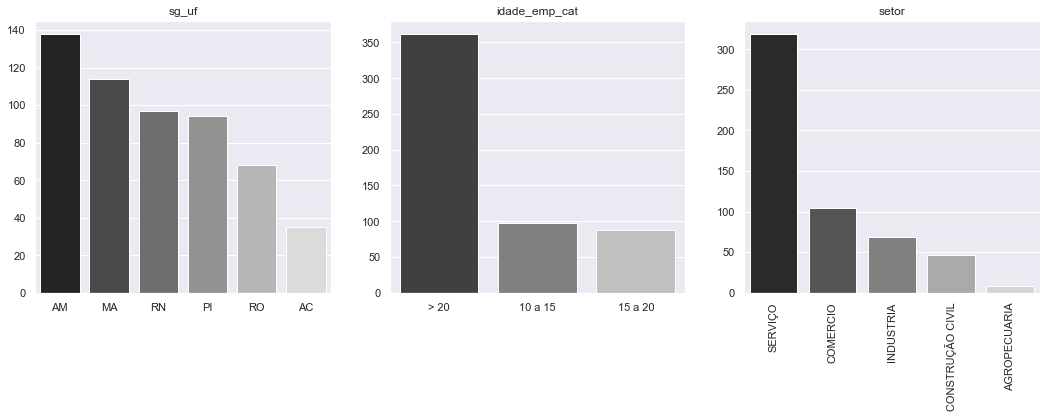

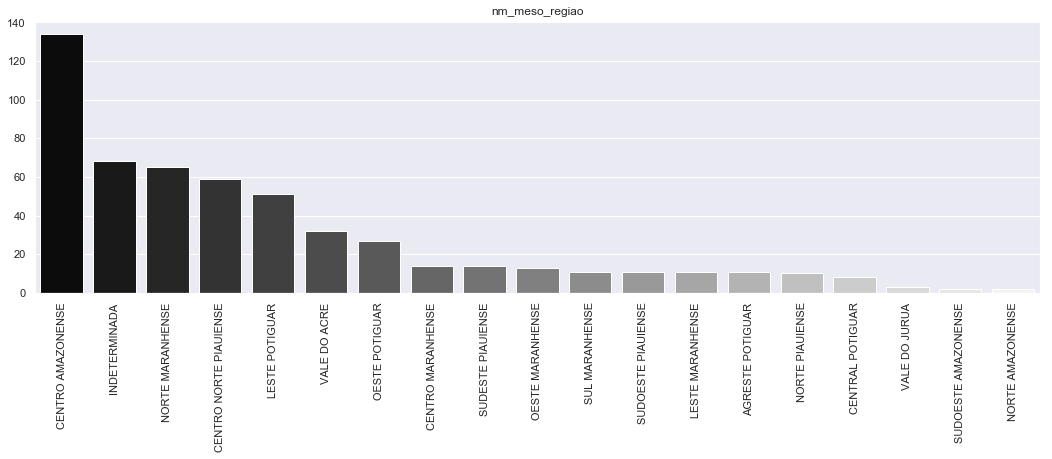

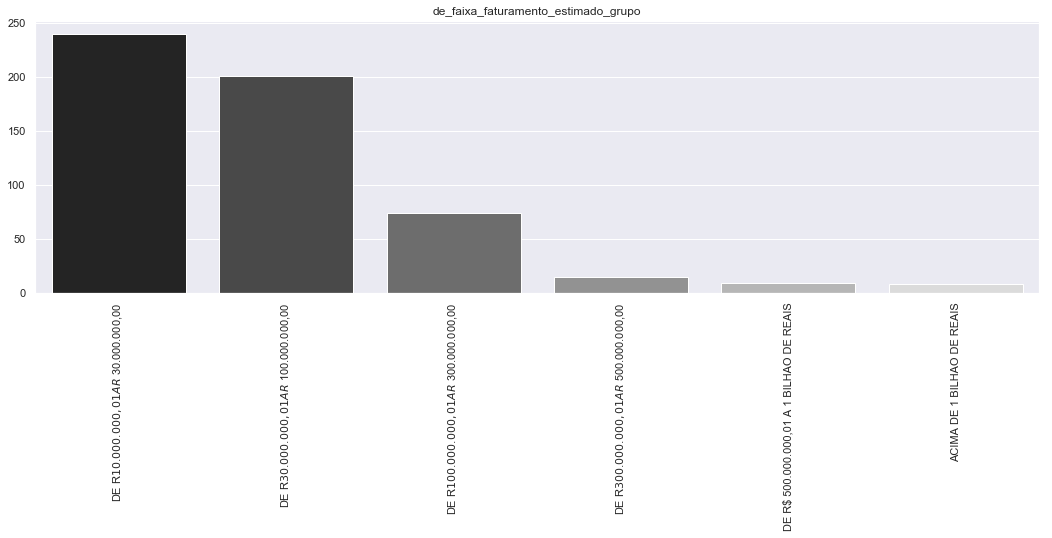

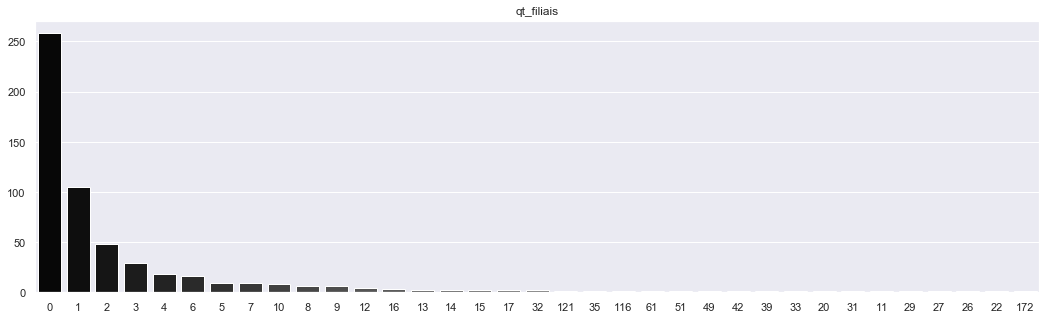

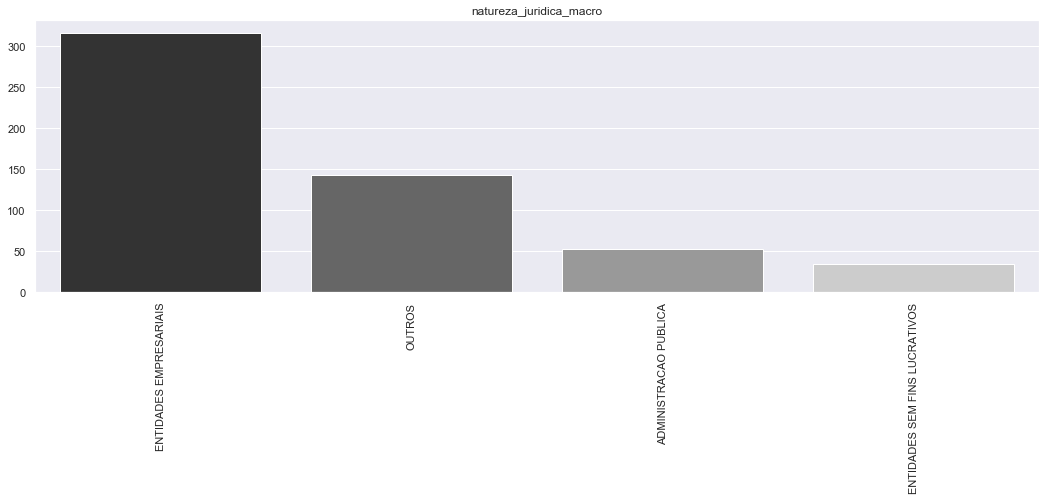

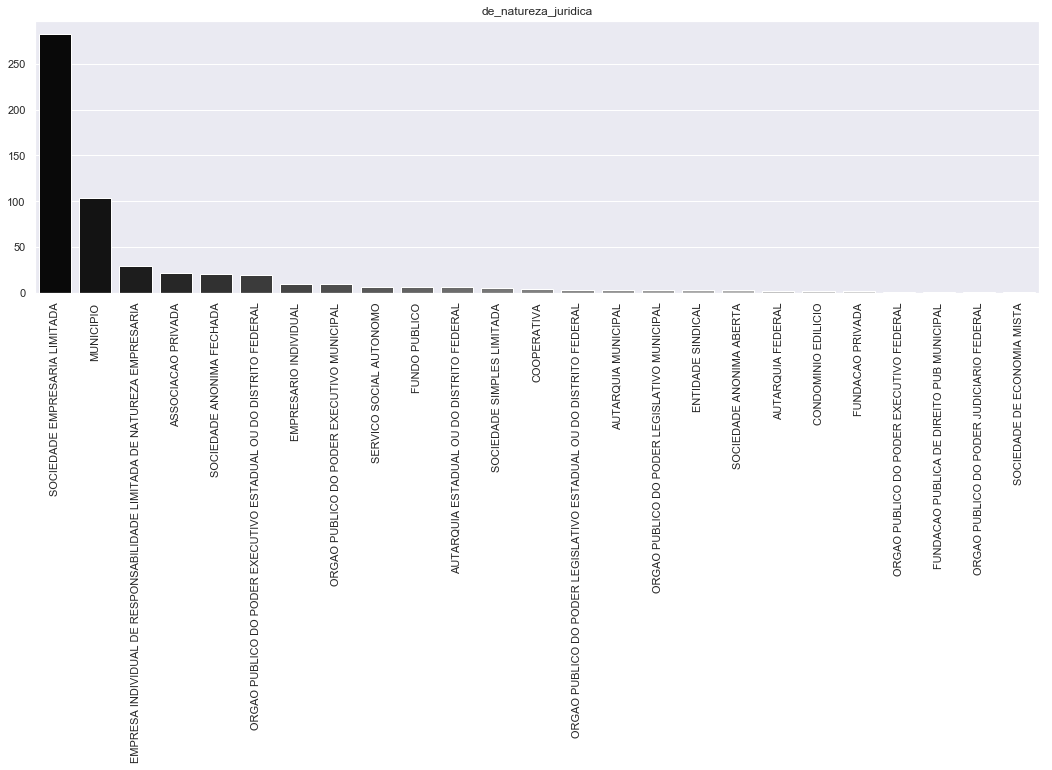

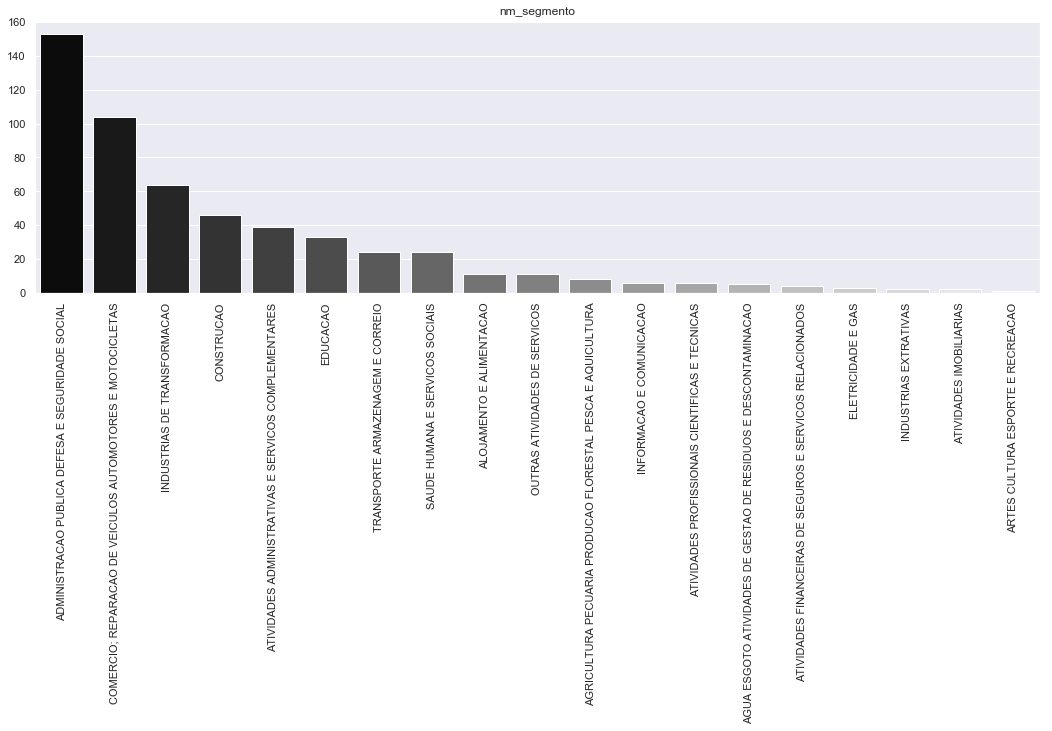

In [75]:
sns.set()
f, axes= plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=portfolio_T4, x="sg_uf", palette = 'gist_gray', order = portfolio_T4['sg_uf'].value_counts().index, ax=axes[0]);
axes[0].set_title("sg_uf")
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.countplot(data=portfolio_T4, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_T4['idade_emp_cat'].value_counts().index, ax=axes[1]);
axes[1].set_title("idade_emp_cat")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

sns.countplot(data=portfolio_T4, x="setor", palette = 'gist_gray', order = portfolio_T4['setor'].value_counts().index, ax=axes[2]);
axes[2].set_title("setor")
plt.xticks(rotation=90)
axes[2].set_ylabel("")
axes[2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_T4['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_T4['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="qt_filiais", palette = 'gist_gray', order = portfolio_T4['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_T4['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_T4['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T4, x="nm_segmento", palette = 'gist_gray', order = portfolio_T4['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

***
## KNN Recommendation model:

> ### Packages:

In [76]:
import sklearn
from sklearn.neighbors import NearestNeighbors

> ### Treino:

In [77]:
nbrs = NearestNeighbors(n_neighbors=15, metric='euclidean').fit(target_market_wtt_id)

> ### Reference / Target:

In [78]:
# Target Customer Creation:
default_customer = full_portfolio_wtt_id.mode()
default_customer = pd.DataFrame(default_customer.iloc[0]).reset_index()
default_customer.columns = ['Columns', 'Sample_values']
default_customer = list(default_customer['Sample_values'])

In [79]:
# values default customer:
print(default_customer)

[0.0, 0.7878747292158818, -1.038966512685496, -0.5213774653581127, -1.0322291879675087, 0.8018539763437639, 1.4812965811588772, 0.6933398880026912, -0.050981274193458166, -0.18860135152924462, 0.0, 0.0, -0.08473580505290222, 0.0, -0.9562384951220851, 0.9053040769256002, 0.8841692124841545, -1.1344571585548386, -1.3589693942883225, -0.2147130525032287, -0.4553627593101022, 0.38368202448222755, -0.34604578196861197, -0.36654739401498454, -0.24444375069276628, -0.16254092112514, -0.2859856188405922, -0.3246524932161152, 0.0, -1.038966512685496, 0.697214777608686, 0.0, -0.28993585464905686, -0.27570121073567266, -0.5256057201320841, 0.0, -0.2629295931200383, -1.0328440936580519, -0.9865656571458976, 0.25308528127975183, 0.4563997203952043, -0.008425061906678456, 0.024336424320030955, -0.2812233932926852, -1.2544364652365254, -1.2492654217082488, -1.2052169401805284, -0.48179909008390004, -0.6000584265182676, -0.33946266709590156, -0.28029242032787494, -0.33672496191151047, -0.2875571987458

> ### Recommendation:

In [80]:
# Recommendation:
print(nbrs.kneighbors([default_customer]))

(array([[5.22819237, 5.45288089, 5.59066072, 5.6086986 , 5.66220555,
        5.71588242, 5.73649368, 5.74690416, 5.81481089, 5.89119783,
        5.8994145 , 5.96004042, 6.0165551 , 6.02363767, 6.08546589]]), array([[157, 296, 102, 213, 170, 636, 496, 255, 559, 503,  45, 796, 188,
        595, 210]]))


In [81]:
# Collection of recommended indexes:
distances, indices= nbrs.kneighbors([default_customer])
distances = distances[0].tolist()
indices = indices[0].tolist()
print(indices) # These indexes are from the training dataset (target_market and target_market_wtt_id)

[157, 296, 102, 213, 170, 636, 496, 255, 559, 503, 45, 796, 188, 595, 210]


> ### Recommendation Preview:

In [82]:
# collecting the 'id_num'
rec = target_market.iloc[indices]

Recommendation = pd.DataFrame()
Recommendation['id_num']= rec['id_num']
Recommendation['id'] = rec['id'] 
# Euclidean distance from target:
Recommendation['distance'] = distances
Recommendation

,id_num,id,distance
157,72552,72793ebb92ba8c1a7d15831ae143db93d62f555f67248abe8911ec6328b7682f,5.228192
296,134702,8aa1be7d2d9a15e7a93845966e5c2eba7b6dec0739ac0794441b3565451e87ca,5.452881
102,46940,037596716a58e6998bff6f5c213e54c015a82faa1c959bb1a120b39d3bf72dbb,5.590661
213,97370,94882fcd564398db3442997c4a39466fbf333671e499c8455d90762590dabeb5,5.608699
170,76155,b9c93c3752531e5a2ef27cb03b3c8d85557849e23da53961190b1db6c9b983da,5.662206
636,302728,6af6bc271202d69e25c3bebe0551117c078e02b48e4105a87a141231bfd7cfd0,5.715882
496,234679,361948409806354145d5b307391af6d595a7b6560afa70db555d87dbc6fb4954,5.736494
255,117923,d7735d67cc1036a1ba3c280eaaab4483d2c342b74bba88658b124804becc2a75,5.746904
559,258301,f6df36316054d5e133ef848953b614400054b646f274c4a42dd320f569990873,5.814811
503,238403,7698fb4775b3dc39a1750b2df07842d4b3decb2d5bde353dc9c04564931ca832,5.891198


In [83]:
# Full Dataset of recommendations:
full_recommendation = pd.DataFrame()
full_recommendation = rec['id_num']
full_recommendation = pd.merge(full_recommendation, market_T4, on='id_num', how='left')
full_recommendation

,id_num,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,72552,72793ebb92ba8c1a7d15831ae143db93d62f555f67248abe8911ec6328b7682f,True,ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,PI,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.010959,> 20,False,False,False,False,False,False,True,True,SIM,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,False,False,True,14.0,0.0,False,3.0,0.0,14.0,False,PI,VERDE,ACIMA DE 1 ANO,23.0,ALTA,BOA,False,444582.0,0.00,CENTRO NORTE PIAUIENSE,TERESINA,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 100.000.000,01 A R$ 300.000.000,00","DE R$ 100.000.000,01 A R$ 300.000.000,00",2942078

> ### Recommended Customer Features:

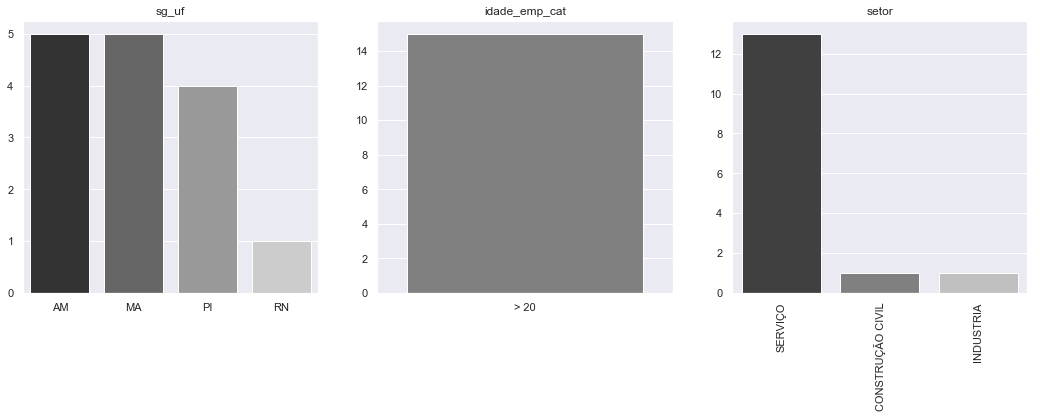

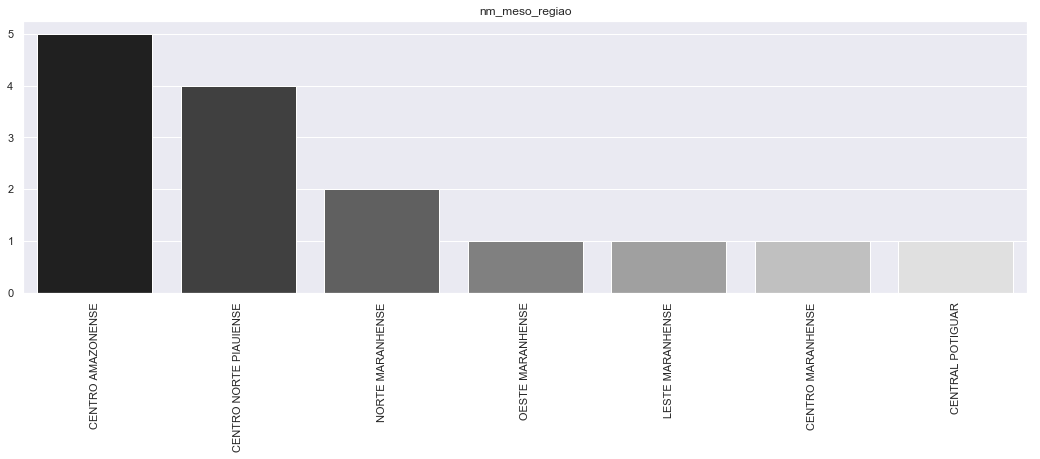

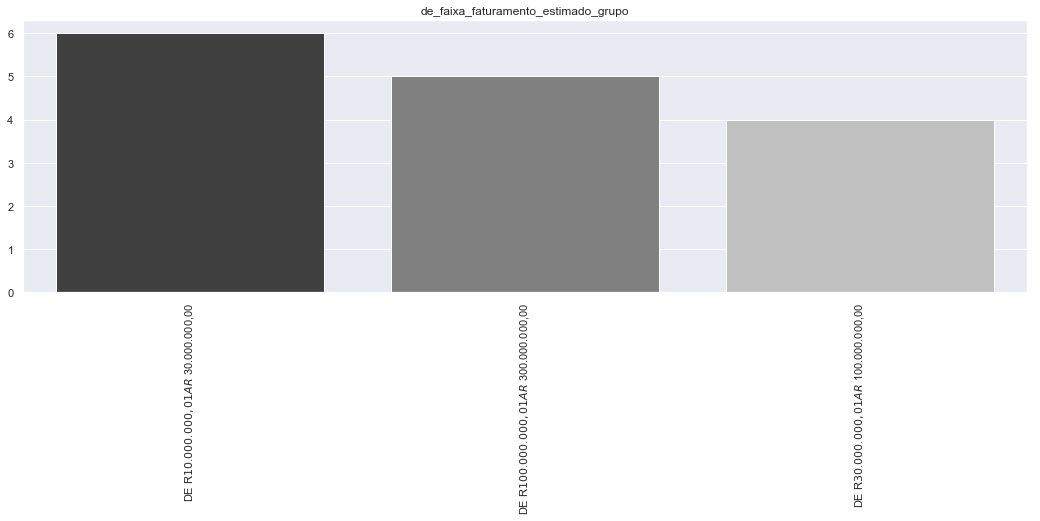

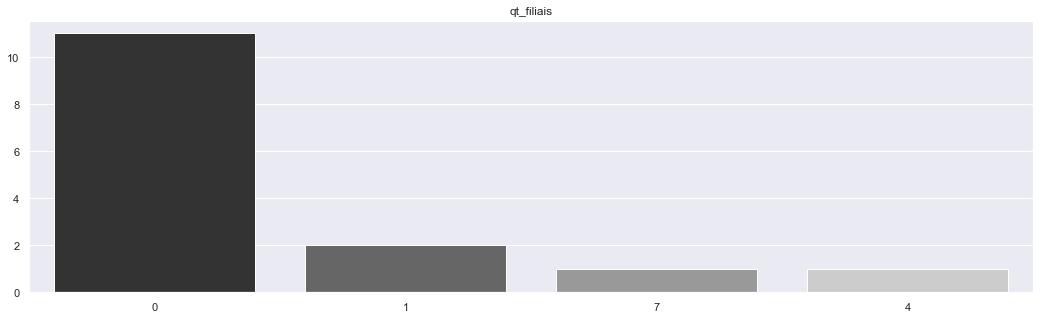

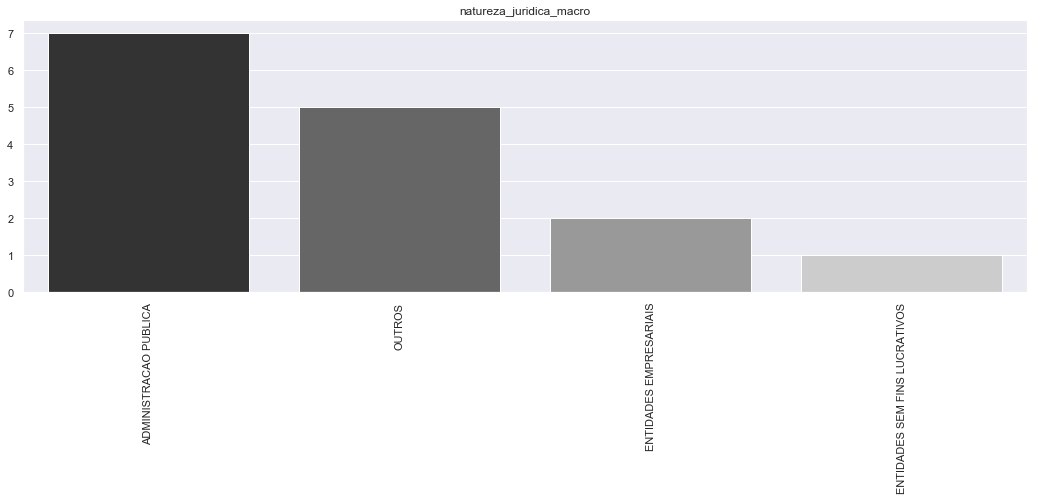

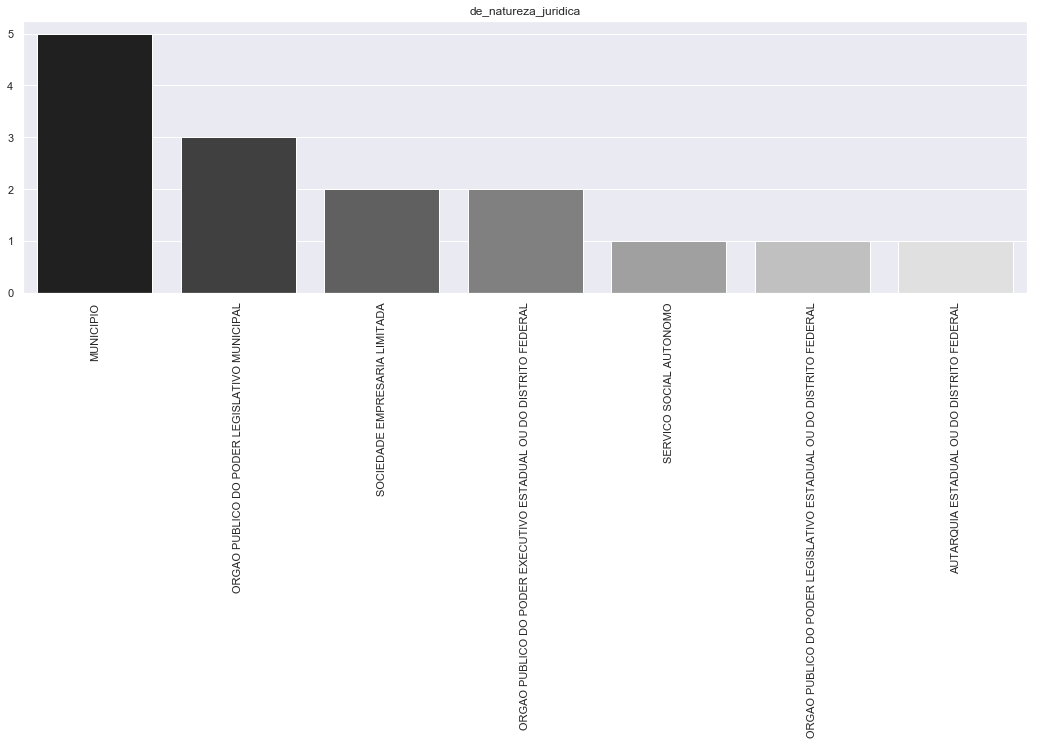

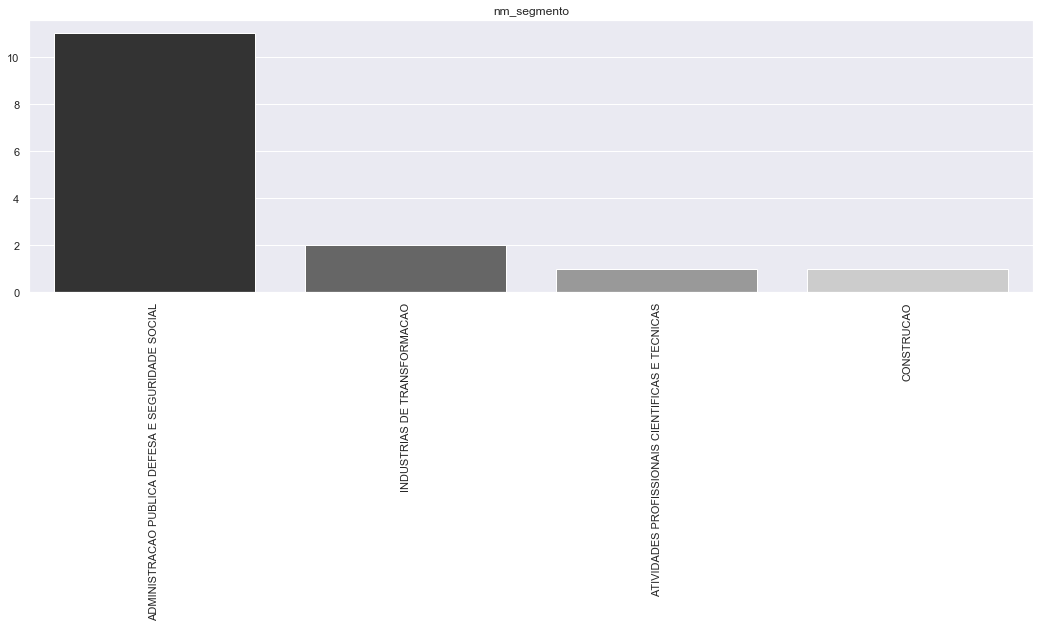

In [84]:
sns.set()
f, axes= plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=full_recommendation, x="sg_uf", palette = 'gist_gray', order = full_recommendation['sg_uf'].value_counts().index, ax=axes[0]);
axes[0].set_title("sg_uf")
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.countplot(data=full_recommendation, x="idade_emp_cat", palette = 'gist_gray', order = full_recommendation['idade_emp_cat'].value_counts().index, ax=axes[1]);
axes[1].set_title("idade_emp_cat")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

sns.countplot(data=full_recommendation, x="setor", palette = 'gist_gray', order = full_recommendation['setor'].value_counts().index, ax=axes[2]);
axes[2].set_title("setor")
plt.xticks(rotation=90)
axes[2].set_ylabel("")
axes[2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="nm_meso_regiao", palette = 'gist_gray', order = full_recommendation['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = full_recommendation['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="qt_filiais", palette = 'gist_gray', order = full_recommendation['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="natureza_juridica_macro", palette = 'gist_gray', order = full_recommendation['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="de_natureza_juridica", palette = 'gist_gray', order = full_recommendation['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=full_recommendation, x="nm_segmento", palette = 'gist_gray', order = full_recommendation['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

***
